In [127]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_crawling_results(df, name):
    # Count the occurrences of different status variables
    status_counts = df['status'].value_counts()

    # Calculate the total number of rows
    total_rows = df.shape[0]

    # Add 'Missing' bar with count: 500 - number of total rows
    status_counts['Missing'] = 500 - total_rows

    # Sort the status counts in descending order
    sorted_status_counts = status_counts.sort_values(ascending=False)

    # Extract status and counts for plotting
    status = sorted_status_counts.index
    counts = sorted_status_counts.values

    # Calculate the relative amounts
    total = counts.sum()
    percentages = (counts / total) * 100

    # Set the size of the figure
    fig, ax = plt.subplots(figsize=(16, 6))  # Adjust the width and height as needed

    # Create a horizontal bar chart
    ax.barh(status, counts)

    # Add count and percentage labels to the right of each bar with line break
    for i, (v, p) in enumerate(zip(counts, percentages)):
        label = f'{v}\n({p:.2f}%)'
        ax.text(v + 0.1, i, label, va='center')

    # Set chart title and labels
    #ax.set_title('Occurrences of Status Variables')
    ax.set_xlabel('Count')
    ax.set_ylabel('Status')

    # Adjust layout to prevent overlap of bar descriptions
    plt.tight_layout()

    # Save the figure with higher resolution (500 DPI)
    plt.savefig(f'{name}.png', dpi=500)

    # Display the chart
    plt.show()


In [128]:
# Read the data from the CSV file
df_all = pd.read_csv('all.csv', delimiter=';')
df_all.head()

,id,name,logo_url,Data Recipients,Safeguards Copy,Processing Purpose,Data Categories,Source of Data,Right to Erase,Right to Restrict,...,Controller Contact,Provision Requirement,Storage Period,Lodge Complaint,DPO Contact,Adequacy Decision,status,policy,Confusion Matrix,Notes
0,com.whatsapp,WhatsApp Messenger,https://play-lh.googleusercontent.com/bYtqbOcT...,1,1,1,1,1,1,1,...,1,1,1,0,1,0,Success,"<br>Visit <a href=""https://play.google.com/sto...",NaN,NaN
1,com.google.android.youtube,YouTube,https://play-lh.googleusercontent.com/lMoItBgd...,1,1,1,1,1,1,1,...,0,1,1,1,0,1,Success,"<br>Visit <a href=""https://play.google.com/sto...",NaN,NaN
2,com.instagram.android,Instagram,https://play-lh.googleusercontent.com/VRMWkE5p...,1,0,1,1,1,0,1,...,1,0,1,0,1,1,Success,"<br>Visit <a href=""https://play.google.com/sto...",NaN,NaN
3,com.facebook.katana,Facebook,https://play-lh.googleusercontent.com/ccWDU4A7...,1,0,1,1,1,0,1,...,1,0,1,0,1,1,Success,"<br>Visit <a href=""https://play.google.com/sto...",NaN,NaN
4,com.dts.freefireth,Free Fire,https://play-lh.googleusercontent.com/9zACfwWC...,1,1,1,1,1,0,1,...,1,1,1,0,1,1,Success,"<br>Visit <a href=""https://play.google.com/sto...",NaN,NaN


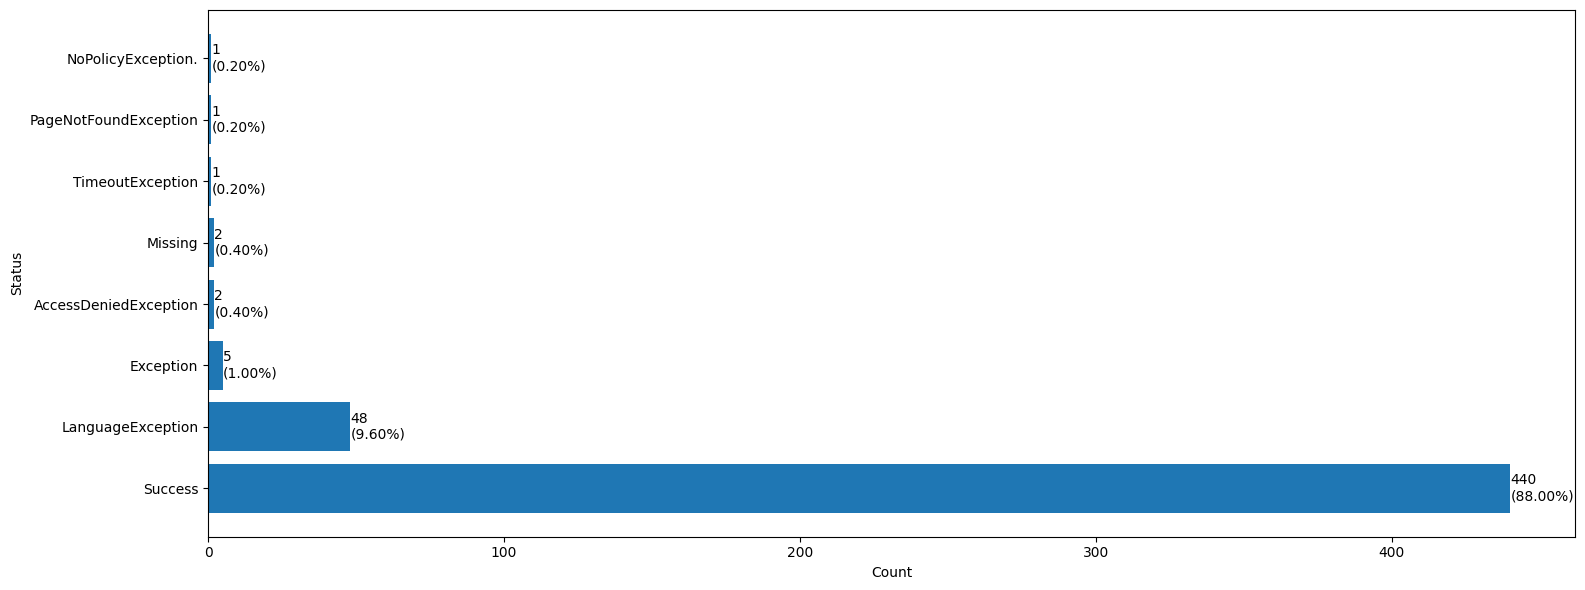

In [129]:
visualize_crawling_results(df_all, 'all')

In [130]:
# For comparison, we visualize the status of a randomly selected category: Music and Audio
# Read the data from the CSV file
df_music_audio = pd.read_csv('music_audio.csv', delimiter=';')
df_music_audio.head()

,id,name,logo_url,Data Recipients,Safeguards Copy,Processing Purpose,Data Categories,Source of Data,Right to Erase,Right to Restrict,...,Right to Portability,Profiling,Controller Contact,Provision Requirement,Storage Period,Lodge Complaint,DPO Contact,Adequacy Decision,status,policy
0,com.spotify.music,Spotify,https://play-lh.googleusercontent.com/cShys-Am...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,LanguageException,<br><strong>WARNING:</strong> An error occurre...
1,com.shazam.android,Shazam,https://play-lh.googleusercontent.com/mwTU9-4N...,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,Success,"<br>Visit <a href=""https://play.google.com/sto..."
2,com.soundcloud.android,SoundCloud,https://play-lh.googleusercontent.com/8mD-WdBs...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,LanguageException,<br><strong>WARNING:</strong> An error occurre...
3,com.tencent.ibg.joox,JOOX Music,https://play-lh.googleusercontent.com/ERcaEpGk...,1,1,1,1,0,1,1,...,1,0,0,1,1,1,1,1,Success,"<br>Visit <a href=""https://play.google.com/sto..."
4,com.jio.media.jiobeats,JioSaavn,https://play-lh.googleusercontent.com/gUR8xEKv...,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,Success,"<br>Visit <a href=""https://play.google.com/sto..."


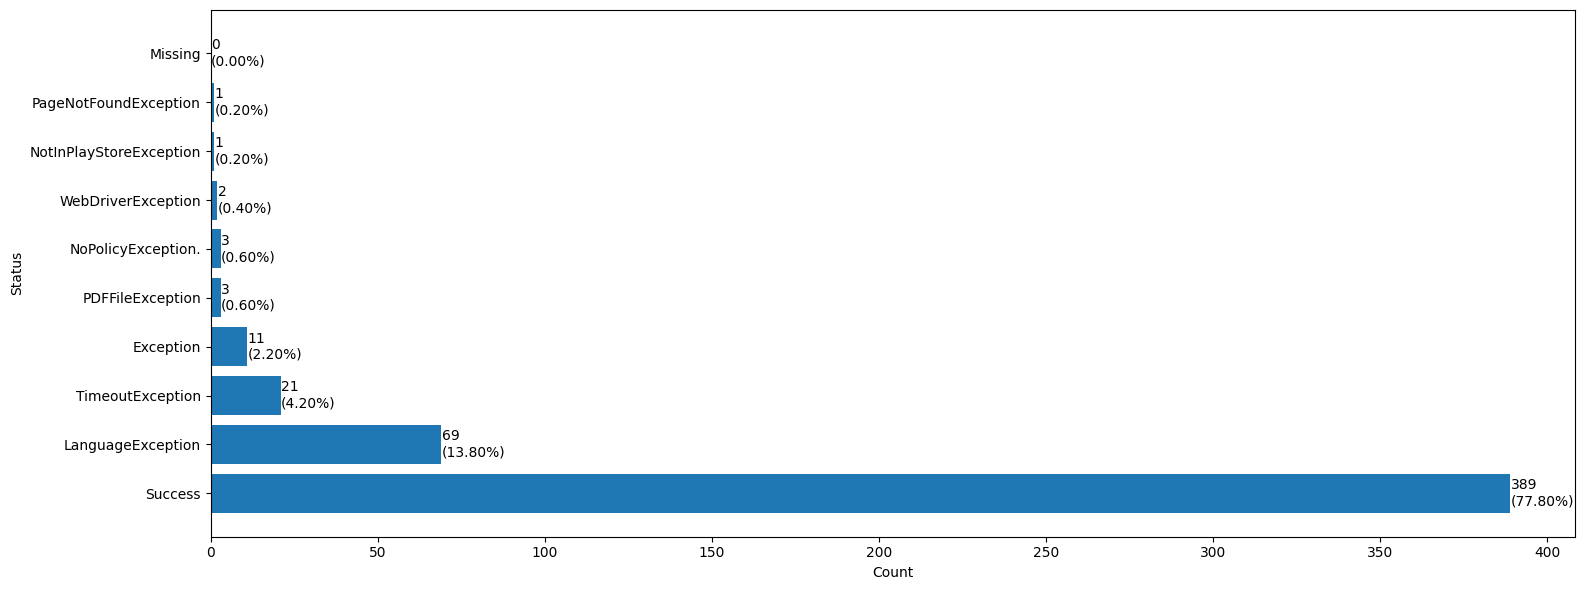

In [131]:
visualize_crawling_results(df_music_audio, 'music_audio')

In [132]:
def preprocess_data(df):
    # Preprocess 'Confusion Matrix' column
    df.loc[(df['Confusion Matrix'] == 1) & (df['status'] == 'Success'), 'Confusion Matrix'] = 'FP'
    df.loc[(df['Confusion Matrix'] != 'FP') & (df['status'] == 'Success'), 'Confusion Matrix'] = 'TP'
    df.loc[(df['Confusion Matrix'] == 1) & (df['status'] != 'Success'), 'Confusion Matrix'] = 'FN'
    df.loc[(df['Confusion Matrix'] != 'FN') & (df['status'] != 'Success'), 'Confusion Matrix'] = 'TN'

    return df
df_all = preprocess_data(df_all)
df_all.head()

,id,name,logo_url,Data Recipients,Safeguards Copy,Processing Purpose,Data Categories,Source of Data,Right to Erase,Right to Restrict,...,Controller Contact,Provision Requirement,Storage Period,Lodge Complaint,DPO Contact,Adequacy Decision,status,policy,Confusion Matrix,Notes
0,com.whatsapp,WhatsApp Messenger,https://play-lh.googleusercontent.com/bYtqbOcT...,1,1,1,1,1,1,1,...,1,1,1,0,1,0,Success,"<br>Visit <a href=""https://play.google.com/sto...",TP,NaN
1,com.google.android.youtube,YouTube,https://play-lh.googleusercontent.com/lMoItBgd...,1,1,1,1,1,1,1,...,0,1,1,1,0,1,Success,"<br>Visit <a href=""https://play.google.com/sto...",TP,NaN
2,com.instagram.android,Instagram,https://play-lh.googleusercontent.com/VRMWkE5p...,1,0,1,1,1,0,1,...,1,0,1,0,1,1,Success,"<br>Visit <a href=""https://play.google.com/sto...",TP,NaN
3,com.facebook.katana,Facebook,https://play-lh.googleusercontent.com/ccWDU4A7...,1,0,1,1,1,0,1,...,1,0,1,0,1,1,Success,"<br>Visit <a href=""https://play.google.com/sto...",TP,NaN
4,com.dts.freefireth,Free Fire,https://play-lh.googleusercontent.com/9zACfwWC...,1,1,1,1,1,0,1,...,1,1,1,0,1,1,Success,"<br>Visit <a href=""https://play.google.com/sto...",TP,NaN


In [133]:
def print_count_eval_fp_fn(df):
    # Print unique values and their counts
    unique_values = df['Confusion Matrix'].unique()
    for value in unique_values:
        count = df['Confusion Matrix'].eq(value).sum()
        print(f"{value}: {count}")

# Print and count all values for Confusion Matrix
print_count_eval_fp_fn(df_all)

TP: 420
FP: 20
FN: 9
TN: 49


<Figure size 640x480 with 0 Axes>

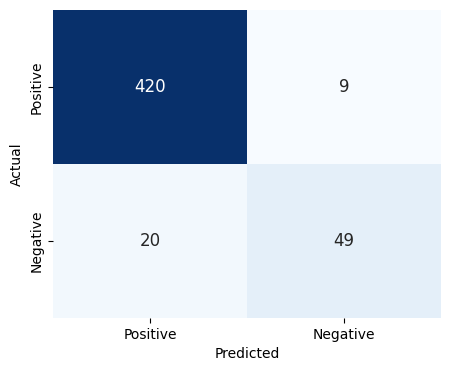

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_confusion_matrix(df, name='confusion_matrix'):
    # Define the values for FP, TP, FN, and TN
    fp = (df['Confusion Matrix'] == 'FP').sum()
    tp = (df['Confusion Matrix'] == 'TP').sum()
    fn = (df['Confusion Matrix'] == 'FN').sum()
    tn = (df['Confusion Matrix'] == 'TN').sum()

    # Create a 2x2 confusion matrix
    confusion_matrix = [[tp, fn], [fp, tn]]

    # Create a list of labels for the x-axis and y-axis
    labels = ['Positive', 'Negative'] 

    # Clear any previous plots
    plt.clf()

    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})

    # Set labels, title, and ticks
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    #plt.title(name)
    plt.xticks(ticks=[0.5, 1.5], labels=labels)
    plt.yticks(ticks=[0.5, 1.5], labels=labels)

    # Add the FP, TP, FN, and TN values to the confusion matrix
    for i in range(len(labels)):
        for j in range(len(labels)):
            count = confusion_matrix[i][j]

    # Save the figure with higher resolution (500 DPI)
    plt.savefig(f'{name}.png', dpi=500)

    # Display the plot
    plt.show()

# Assuming you have a DataFrame named df_all containing the data
visualize_confusion_matrix(df_all)
